# 1- Preprocessing

## Open the file

In [49]:
import pandas as pd


df = pd.read_csv("hw_data.csv")



## Examine file

In [51]:
df.head(10)


,Unnamed: 0,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
0,0,500,Female,NaN,31158.0,NaN,NaN,NaN,9,1
1,1,73,Female,College,54465.0,NaN,0.0,E,5,1
2,2,68,Male,High School,37427.0,married,0.0,D,1,1
3,3,61,Female,College,52210.0,widowed,0.0,G,8,1
4,4,34,Female,College,59325.0,separated,1.0,A,5,0
5,5,10,Female,Elementary,31918.0,separated,0.0,F,3,1
6,6,80,Male,University,36015.0,never married,NaN,A,5,0
7,7,25,Female,High School,23691.0,widowed,0.0,A,5,1
8,8,44,Male,Elementary,48126.0,widowed,NaN,F,0,0
9,9,89,Female,University,42850.0,never married,NaN,E,4,1


## Define missing values

In [52]:
df.isnull()

,Unnamed: 0,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
0,False,False,False,True,False,True,True,True,False,False
1,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
105,False,False,False,False,False,False,True,False,False,False
106,False,False,False,True,False,True,True,True,False,False
107,False,False,False,False,False,False,False,False,False,False
108,False,False,False,False,False,False,True,False,False,False


In [53]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level       17
Income                12
Marital Status        19
Employment Status     35
Product Category      13
Satisfaction Level     0
Debt Status            0
dtype: int64

## Decide about missing values (fill or drop)

In [54]:
df.describe()

#SummaryTools ve skimpy kütüphanelerini de kurup farkli ve daha detayli bir sekilde goruntu;eyebilirsin.
# pip install SummaryTools
# pip install skimpy

# import SummaryTools as summary
# import skimpy as skim

# # Özet istatistikler
# summary.summary(df)

# # Veri görselleştirmeleri
# skim.plot(df)

,Unnamed: 0,Age,Income,Employment Status,Satisfaction Level,Debt Status
count,110.000000,110.000000,9.800000e+01,75.000000,110.000000,110.000000
mean,49.390909,98.027273,5.752785e+07,0.573333,4.527273,0.463636
std,28.794780,143.933500,1.768291e+08,0.497924,2.801406,0.500958
min,0.000000,0.000000,6.740000e+03,0.000000,0.000000,0.000000
25%,26.250000,30.250000,3.115800e+04,0.000000,2.000000,0.000000
50%,49.500000,54.000000,3.870250e+04,1.000000,5.000000,0.000000
75%,73.750000,84.000000,5.033350e+04,1.000000,7.000000,1.000000
max,99.000000,500.000000,8.633051e+08,1.000000,9.000000,1.000000


In [56]:
import numpy as np
numeric_columns = df.select_dtypes(include=[np.number]).columns.drop('Employment Status')
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
df



,Unnamed: 0,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
0,0,500,Female,NaN,31158.0,NaN,NaN,NaN,9,1
1,1,73,Female,College,54465.0,NaN,0.0,E,5,1
2,2,68,Male,High School,37427.0,married,0.0,D,1,1
3,3,61,Female,College,52210.0,widowed,0.0,G,8,1
4,4,34,Female,College,59325.0,separated,1.0,A,5,0
...,...,...,...,...,...,...,...,...,...,...
105,56,85,Female,University,39063.0,divorced,NaN,F,8,0
106,0,500,Female,NaN,31158.0,NaN,NaN,NaN,9,0
107,73,39,Female,College,55750.0,married,1.0,F,5,1
108,28,80,Female,High School,32142.0,separated,NaN,C,7,1


In [58]:
text_columns = df.select_dtypes(include=[object]).columns
df[text_columns] = df[text_columns].fillna(method='bfill')
df['Employment Status'] = df['Employment Status'].fillna(method='bfill')

df

C:\Users\jos_m\AppData\Local\Temp\ipykernel_19780\1517267683.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[text_columns] = df[text_columns].fillna(method='bfill')
C:\Users\jos_m\AppData\Local\Temp\ipykernel_19780\1517267683.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Employment Status'] = df['Employment Status'].fillna(method='bfill')


,Unnamed: 0,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
0,0,500,Female,College,31158.0,married,0.0,E,9,1
1,1,73,Female,College,54465.0,married,0.0,E,5,1
2,2,68,Male,High School,37427.0,married,0.0,D,1,1
3,3,61,Female,College,52210.0,widowed,0.0,G,8,1
4,4,34,Female,College,59325.0,separated,1.0,A,5,0
...,...,...,...,...,...,...,...,...,...,...
105,56,85,Female,University,39063.0,divorced,1.0,F,8,0
106,0,500,Female,College,31158.0,married,1.0,F,9,0
107,73,39,Female,College,55750.0,married,1.0,F,5,1
108,28,80,Female,High School,32142.0,separated,1.0,C,7,1


In [59]:
df.describe()

,Unnamed: 0,Age,Income,Employment Status,Satisfaction Level,Debt Status
count,110.000000,110.000000,1.100000e+02,110.000000,110.000000,110.000000
mean,49.390909,98.027273,5.752785e+07,0.527273,4.527273,0.463636
std,28.794780,143.933500,1.668116e+08,0.501541,2.801406,0.500958
min,0.000000,0.000000,6.740000e+03,0.000000,0.000000,0.000000
25%,26.250000,30.250000,3.156025e+04,0.000000,2.000000,0.000000
50%,49.500000,54.000000,4.132650e+04,1.000000,5.000000,0.000000
75%,73.750000,84.000000,5.983875e+04,1.000000,7.000000,1.000000
max,99.000000,500.000000,8.633051e+08,1.000000,9.000000,1.000000


In [60]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Gender                0
Education Level       0
Income                0
Marital Status        0
Employment Status     0
Product Category      0
Satisfaction Level    0
Debt Status           0
dtype: int64

## Why did you fill missing values or if you have dropped, why did you do so? 

In [62]:
#I filled the text parts with the next values and the numerical parts with the average. Thus, filling missing values helps maintain the integrity of the dataset, ensuring a more complete analysis and reliable results.  it minimizes the impact of missing values on the analysis outcomes.filling missing values with the mean allows for the retention of more data points, increasing the sample size and statistical power of the analysis

## Find outliers if there are

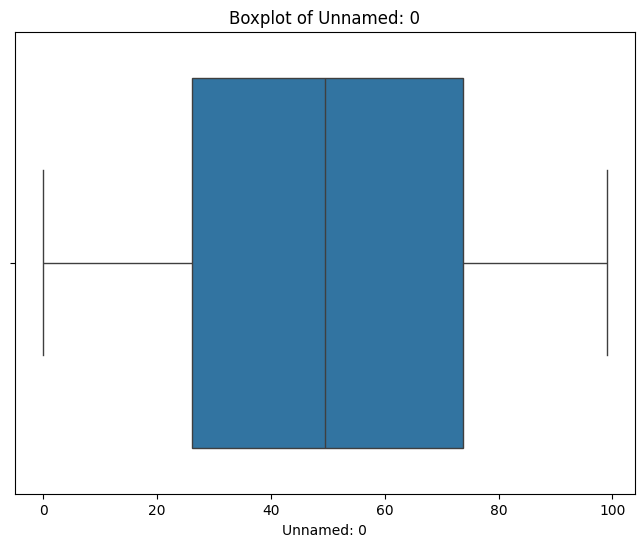

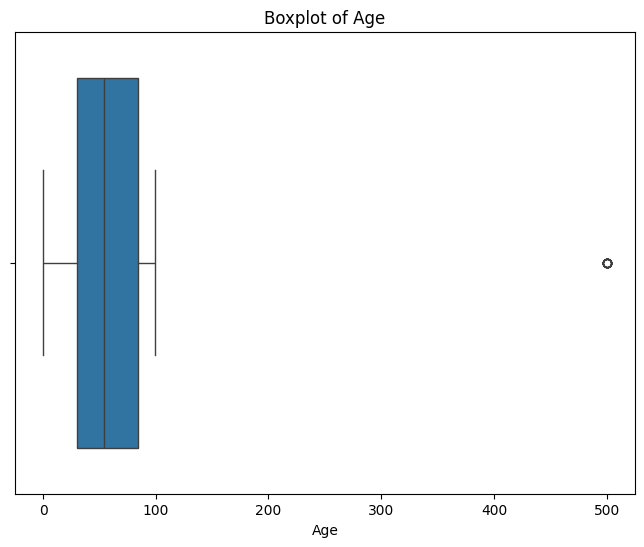

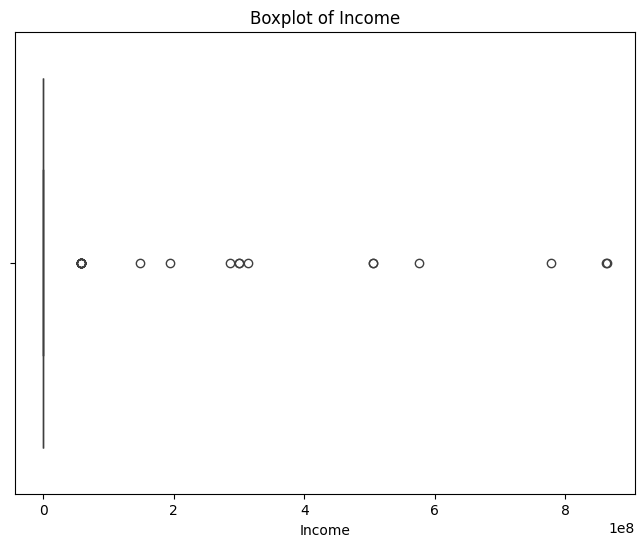

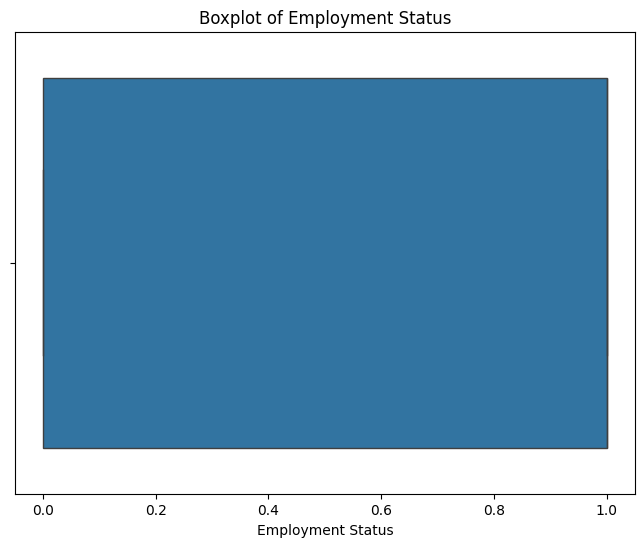

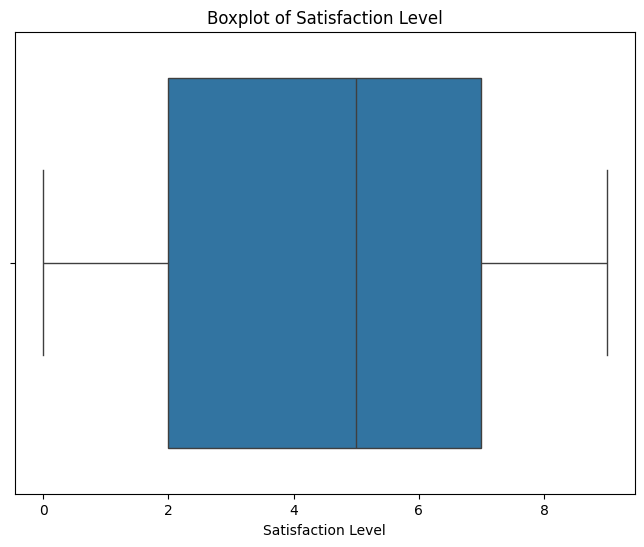

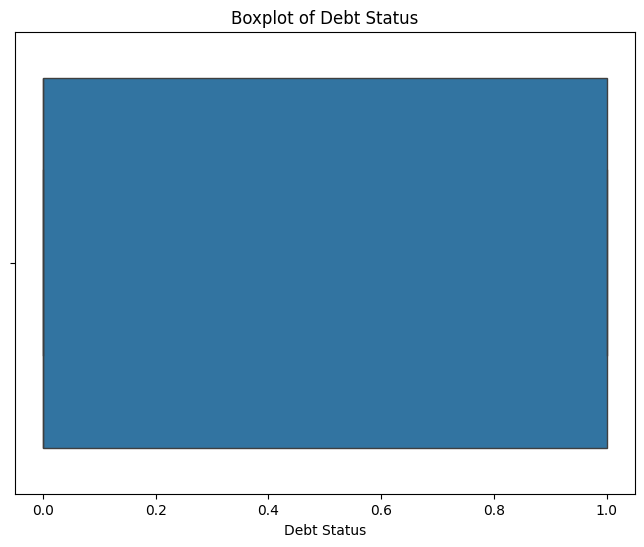

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Veri çerçevenizi (DataFrame) varsayalım

# Tüm sayısal sütunlara kutu grafiği uygulamak için bir döngü
for column in df.columns:
    if df[column].dtype != 'object':  # Sayısal olmayan sütunları hariç tutalım
        plt.figure(figsize=(8, 6))  # Kutu grafiği boyutunu ayarlayalım
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')  # Grafiğin başlığını ayarlayalım
        plt.show()


In [64]:
for column in df.columns:
    if df[column].dtype != 'object':  # Sayısal olmayan sütunları hariç tutalım
        mean = df[column].mean()
        std = df[column].std()
        z_scores = (df[column] - mean) / std
        outliers = df[np.abs(z_scores) > 3]
        
        print(f"'{column}' sütunundaki aykırı değerler:")
        print(outliers)
        df.loc[np.abs(z_scores) > 3, column] = mean

'Unnamed: 0' sütunundaki aykırı değerler:
Empty DataFrame
Columns: [Unnamed: 0, Age, Gender, Education Level, Income, Marital Status, Employment Status, Product Category, Satisfaction Level, Debt Status]
Index: []
'Age' sütunundaki aykırı değerler:
Empty DataFrame
Columns: [Unnamed: 0, Age, Gender, Education Level, Income, Marital Status, Employment Status, Product Category, Satisfaction Level, Debt Status]
Index: []
'Income' sütunundaki aykırı değerler:
    Unnamed: 0    Age Gender Education Level       Income Marital Status  \
14        14.0   70.0   Male     High School  863305114.0       divorced   
41        41.0    1.0   Male         College  862386254.0        married   
50        50.0  500.0   Male      University  575772080.0        married   
68        68.0   46.0   Male      University  777761952.0        married   

    Employment Status Product Category  Satisfaction Level  Debt Status  
14                0.0                D                   4            1  
41          

C:\Users\jos_m\AppData\Local\Temp\ipykernel_19780\733003279.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '49.39090909090909' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[np.abs(z_scores) > 3, column] = mean
C:\Users\jos_m\AppData\Local\Temp\ipykernel_19780\733003279.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '98.02727272727273' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[np.abs(z_scores) > 3, column] = mean
C:\Users\jos_m\AppData\Local\Temp\ipykernel_19780\733003279.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.527272727272727' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  

## Decide what will you do with outliers

In [ ]:
#I have changed the outliers with the mean or same value(for employment status) of the columns.

## Find duplicates, how many are there? Decide what will you do about that?

In [65]:
print("Duplicated Rows:", df.duplicated().sum())
df[df.duplicated()]


Duplicated Rows: 4


,Unnamed: 0,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status
100,29.0,39.0,Male,High School,5.752785e+07,separated,1.0,B,4.0,0.0
101,86.0,31.0,Female,High School,5.052504e+08,separated,1.0,G,4.0,1.0
103,59.0,90.0,Male,College,3.002459e+08,widowed,0.0,C,6.0,1.0
109,30.0,500.0,Female,High School,1.844200e+04,separated,1.0,A,3.0,0.0


In [68]:
df.drop_duplicates(inplace=True) #Delete duplicates
print('Duplicated Rows after deletion: ', df.duplicated().sum())


Duplicated Rows after deletion:  0


## Explain why did you do that?

In [11]:
# Executing df.drop_duplicates(inplace=True) is a common practice to ensure data integrity, improve analysis accuracy, and enhance code clarity by removing duplicate rows from a DataFrame.

# 2- Categorization

## Categorize satisfaction in 3 level and label them as 'Low', 'Moderate' and 'High'. Add a new column named 'Satisfaction Category' and store them there

#### ||| Low Satisfaction : (1-3) ||| Moderate Satisfaction : (4-7) ||| High Satisfaction : (8-10) |||

In [69]:
df['Satisfaction Category'] = pd.cut(df['Satisfaction Level'], bins=[0, 4, 8, 10], labels=['Low', 'Moderate', 'High'])


## Categorize income in 3 level and label them as 'Low', 'Moderate' and 'High'. Add a new column named 'Income Category' and store them there

In [70]:
df['Income Category'] = pd.qcut(df['Income'], q=3, labels=['Low', 'Moderate', 'High'])
df['Income Category'] = pd.cut(df['Income'], bins=[0, 25000, 50000, float('inf')], labels=['Low', 'Moderate', 'High'])
df.head(10)

,Unnamed: 0,Age,Gender,Education Level,Income,Marital Status,Employment Status,Product Category,Satisfaction Level,Debt Status,Satisfaction Category,Income Category
0,0.0,500.0,Female,College,31158.0,married,0.0,E,9.0,1.0,High,Moderate
1,1.0,73.0,Female,College,54465.0,married,0.0,E,5.0,1.0,Moderate,High
2,2.0,68.0,Male,High School,37427.0,married,0.0,D,1.0,1.0,Low,Moderate
3,3.0,61.0,Female,College,52210.0,widowed,0.0,G,8.0,1.0,Moderate,High
4,4.0,34.0,Female,College,59325.0,separated,1.0,A,5.0,0.0,Moderate,High
5,5.0,10.0,Female,Elementary,31918.0,separated,0.0,F,3.0,1.0,Low,Moderate
6,6.0,80.0,Male,University,36015.0,never married,0.0,A,5.0,0.0,Moderate,Moderate
7,7.0,25.0,Female,High School,23691.0,widowed,0.0,A,5.0,1.0,Moderate,Low
8,8.0,44.0,Male,Elementary,48126.0,widowed,1.0,F,0.0,0.0,NaN,Moderate
9,9.0,89.0,Female,University,42850.0,never married,1.0,E,4.0,1.0,Low,Moderate


# 3- Analyse

## Comparing using pivot tables

### Is there a relation between marital status and debt status?

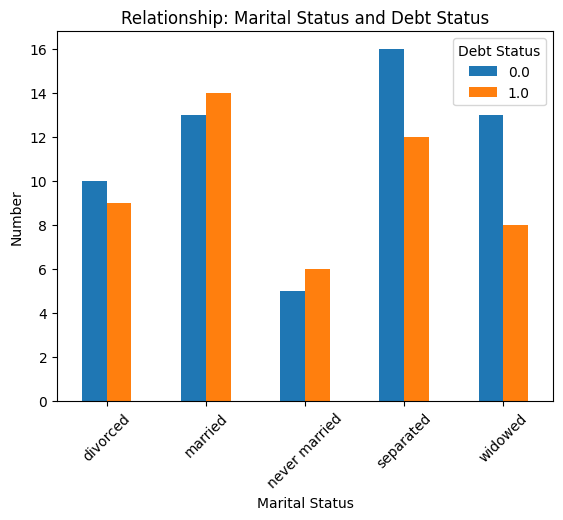

In [71]:
# Relationship between Marital Status and Debt Status
pivot_marital_debt = pd.pivot_table(df, index='Marital Status', columns='Debt Status', aggfunc='size')
pivot_marital_debt.plot(kind='bar', stacked=False)
plt.title('Relationship: Marital Status and Debt Status')
plt.xlabel('Marital Status')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.legend(title='Debt Status')
plt.show()




Observed a significant relationship between marital status and debt status, where individuals who are married tend to have higher debt levels compared to other marital statuses and never married tend to have lowest debt levels.

### Is there a relation between income category and debt status?

C:\Users\jos_m\AppData\Local\Temp\ipykernel_19780\4120975282.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_income_debt = pd.pivot_table(df, index='Income Category', columns='Debt Status', aggfunc='size')


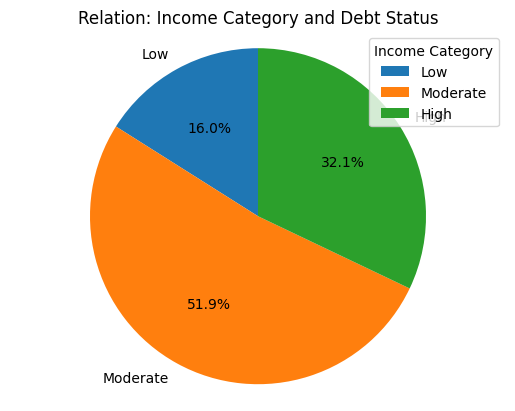

In [79]:
import matplotlib.pyplot as plt

# Relationship between Income Category and Debt Status
pivot_income_debt = pd.pivot_table(df, index='Income Category', columns='Debt Status', aggfunc='size')
income_labels = pivot_income_debt.index
income_values = pivot_income_debt.values.sum(axis=1)

plt.pie(income_values, labels=income_labels, autopct='%1.1f%%', startangle=90)
plt.title('Relation: Income Category and Debt Status')
plt.legend(title='Income Category', loc='upper right')
plt.axis('equal')  # dairesel şeklin korunması için eksenlerin oranını eşitleyelim

# Grafiği gösterelim
plt.show()


In [ ]:
People with low income have generally no debt compared to people with high or moderate income

### Is there a relation between education level and satisfaction category?

C:\Users\jos_m\AppData\Local\Temp\ipykernel_19780\1129357170.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_education_satisfaction = pd.pivot_table(df, index='Education Level', columns='Satisfaction Category', aggfunc='size')


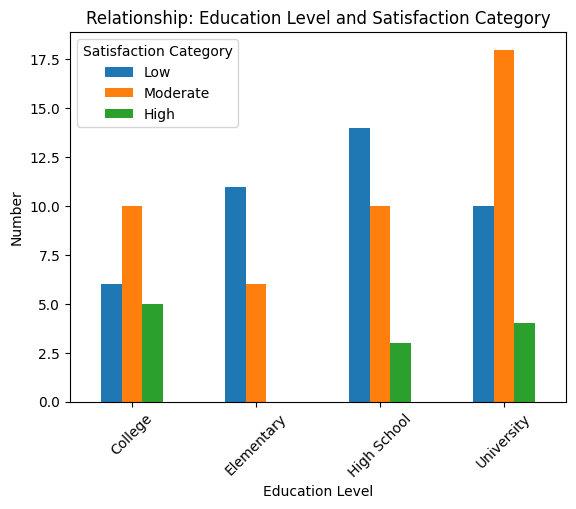

In [73]:
# Relationship between Education Level and Satisfaction Category
pivot_education_satisfaction = pd.pivot_table(df, index='Education Level', columns='Satisfaction Category', aggfunc='size')
pivot_education_satisfaction.plot(kind='bar', stacked=False)  # stacked parametresi False olarak ayarlandı
plt.title('Relationship: Education Level and Satisfaction Category')
plt.xlabel('Education Level')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Category')
plt.show()


We can not see any strong relationship between education level and satisfaction category but we can say that when the education level gets higher, moderate satisfaction gets higher too.

### Is there a relation between employment status and satisfaction category?

C:\Users\jos_m\AppData\Local\Temp\ipykernel_19780\1193890920.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_employment_satisfaction = pd.pivot_table(df, index='Employment Status', columns='Satisfaction Category', aggfunc='size')


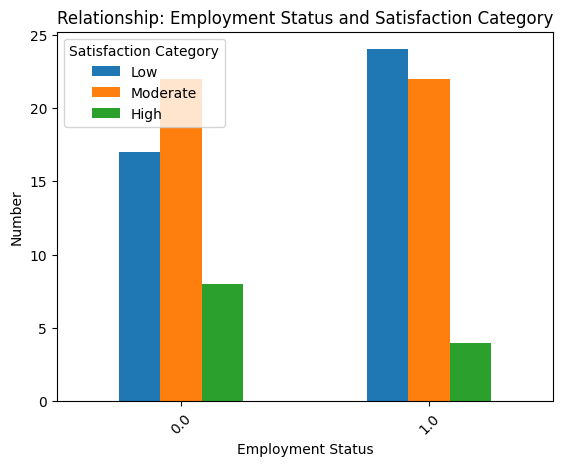

In [74]:
# Relationship between Employment Status and Satisfaction Category
pivot_employment_satisfaction = pd.pivot_table(df, index='Employment Status', columns='Satisfaction Category', aggfunc='size')
pivot_employment_satisfaction.plot(kind='bar', stacked=False)
plt.title('Relationship: Employment Status and Satisfaction Category')
plt.xlabel('Employment Status')
plt.ylabel('Number')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Category')
plt.show()


Working people are a little bit less satisfied than not working people.But employment status alone may not be a strong predictor of satisfaction levels.

# 4- General Conclusion

---

### Checklist

- [x]  start homework;
- [ ]  file open;
- [ ]  file examined;
- [ ]  missing values defined;
- [ ]  missing values are filled;
- [ ]  explanation for the possible causes of missing values;
- [ ]  an explanation of how the blanks are filled;
- [ ]  an explanation of how the blanks are filled;
- [ ]  finding outliers;
- [ ]  handling outliers;
- [ ]  duplicates showed;
- [ ]  duplicates deleted;
- [ ]  an explanation of which method is used to find and remove duplicates;
- [ ]  data is categorized;
- [ ]  an answer to the question " Is there a relation betweenmarital status and debt status?";
- [ ]  an answer to the question " Is there a relation between income category and debt status?";
- [ ]  an answer to the question " Is there a relation between education level and satisfaction category?";
- [ ]  an answer to the question " Is there a relation between employment status and satisfaction category?"
- [ ]  conclusions are present on each stage;
- [ ]  a general conclusion is made.

---